**Lab 5: Implement linear regression with stochastic mini-batch gradient descent  and compare
the results with previous exercise.**




In [1]:
#import the required libraries
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
data = fetch_california_housing()
housesDf = pd.DataFrame(data.data,columns=data.feature_names)
housesDf['Target'] = data.target

X = data.data
y = data.target

In [3]:
# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Add bias term to X
X = np.c_[np.ones(X.shape[0]), X]
def get_batches(X, y, batch_size):
  for i in range(0, len(X), batch_size):
    yield X[i:i+batch_size], y[i:i+batch_size]


In [4]:
# Initialize weights with zeros
num_features = X.shape[1]
weights = np.zeros(num_features)

learning_rate = 0.01
num_epochs = 100
batch_size = 32

losses = []

for epoch in range(num_epochs):
  indices = np.arange(len(X))
  np.random.shuffle(indices)
  X_shuffled = X[indices]
  y_shuffled = y[indices]

  for X_batch, y_batch in get_batches(X_shuffled, y_shuffled, batch_size):
    predictions = np.dot(X_batch, weights)
    error = predictions - y_batch
    gradients = np.dot(X_batch.T, error) / batch_size
    weights -= learning_rate * gradients

  mse = np.mean((np.dot(X, weights) - y) ** 2)
  losses.append(mse)

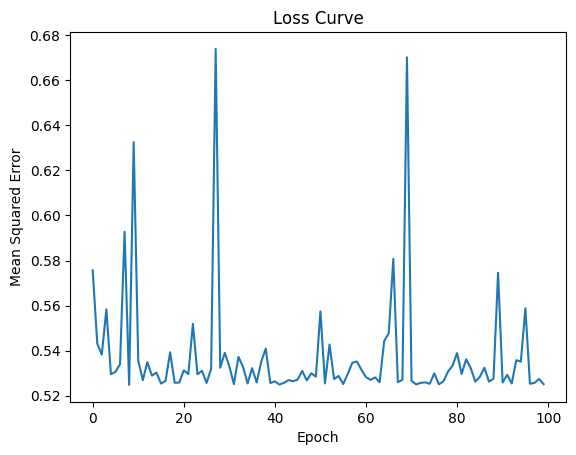

Final Weights: [ 2.07064925  0.82449239  0.1277461  -0.25301849  0.29799879 -0.01227065
 -0.01588542 -0.90160573 -0.87877698]


In [5]:

# Plot the loss curve
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.title('Loss Curve')
plt.show()
print("Final Weights:", weights)